# MMS in pyRFU
Louis RICHARD (louis.richard@irfu.se)



## Getting Started
To get up and running with Python, virtual environments and pyRFU, see: \
https://pyrfu.readthedocs.io/en/latest/getting_started.html#installation

Python 3.7 or later is required; we recommend installing Anaconda to get
everything up and running.

### Virtual environments
It's best to setup and use virtual environments when using Python - these allow you to avoid common dependency problems when you install multiple packages\
`python -m venv pyrfu-tutorial`\
Then, to run the virtual environment, on Mac and Linux :\
`source pyrfu-tutorial/bin/activate`\
To exit the current virtual environment, type `deactivate`

### Install pyRFU
`pip install pyrfu`
### Upgrade pyRFU
`pip install pyrfu --upgrade`
### Local data directory
We use environment variables to set the local data directories:\
data_path (root data directory for all missions in pyRFU) e.g., if you set data_path="/Volumes/mms", your data will be stored in /Volumes/mms

The load routines supported include:
- Fluxgate Magnetometer (FGM)
- Search-coil Magnetometer (SCM)
- Electric field Double Probe (EDP)
- Fast Plasma Investigation (FPI)
- Hot Plasma Composition Analyzer (HPCA)
- Energetic Ion Spectrometer (EIS)
- Fly's Eye Energetic Particle Sensor (FEEPS)
- Ephemeris and Coordinates (MEC)

## Import MMS routines

In [1]:
from pyrfu import mms

## Define time interval

In [2]:
tint = ["2019-09-14T07:54:00.000", "2019-09-14T08:11:00.000"]

## Setup the MMS data path
The MMS data path can be setup using mms.db_init

In [3]:
mms.db_init("/Volumes/mms")

## Load data
Keywords to access data can be found in the help of mms.get_data

In [4]:
help(mms.get_data)

Help on function get_data in module pyrfu.mms.get_data:

get_data(var_str, tint, mms_id, verbose: bool = True, data_path: str = '')
    Load a variable. var_str must be in var (see below)
    
    Parameters
    ----------
    var_str : str
        Key of the target variable (use mms.get_data() to see keys.).
    tint : list of str
        Time interval.
    mms_id : str or int
        Index of the target spacecraft.
    verbose : bool, Optional
        Set to True to follow the loading. Default is True.
    data_path : str, Optional
        Path of MMS data. If None use `pyrfu.mms.mms_config.py`
    
    Returns
    -------
    out : xarray.DataArray or xarray.Dataset
        Time series of the target variable of measured by the target
        spacecraft over the selected time interval.
    
    See also
    --------
    pyrfu.mms.get_ts : Read time series.
    pyrfu.mms.get_dist : Read velocity distribution function.
    
    Examples
    --------
    >>> from pyrfu import mms
    
 

### Load magnetic field from (FGM)

In [5]:
b_xyz = mms.get_data("b_gse_fgm_srvy_l2", tint, 1)

09-Dec-21 10:55:15: Loading mms1_fgm_b_gse_srvy_l2...


### Load ions and electrons bulk velocity, number density and DEF (FPI)

In [6]:
n_i, n_e = [mms.get_data(f"n{s}_fpi_fast_l2", tint, 1) for s in ["i", "e"]]
# n_i, n_e = [mms.get_data("n{}_fpi_fast_l2".format(s), tint, 1) for s in ["i", "e"]]
v_xyz_i, v_xyz_e = [mms.get_data(f"v{s}_gse_fpi_fast_l2", tint, 1) for s in ["i", "e"]]
def_omni_i, def_omni_e = [mms.get_data(f"def{s}_fpi_fast_l2", tint, 1) for s in ["i", "e"]]

09-Dec-21 10:55:16: Loading mms1_dis_numberdensity_fast...
09-Dec-21 10:55:19: Loading mms1_des_numberdensity_fast...
09-Dec-21 10:55:23: Loading mms1_dis_bulkv_gse_fast...
09-Dec-21 10:55:31: Loading mms1_des_bulkv_gse_fast...
09-Dec-21 10:55:39: Loading mms1_dis_energyspectr_omni_fast...
09-Dec-21 10:55:45: Loading mms1_des_energyspectr_omni_fast...


### Load electric field (EDP)

In [7]:
e_xyz = mms.get_data("e_gse_edp_fast_l2", tint, 1)

09-Dec-21 10:55:52: Loading mms1_edp_dce_gse_fast_l2...


## Plot overview

In [8]:
import matplotlib.pyplot as plt

from pyrfu.plot import plot_line, plot_spectr

Load IGRF coefficients ...


<IPython.core.display.Javascript object>


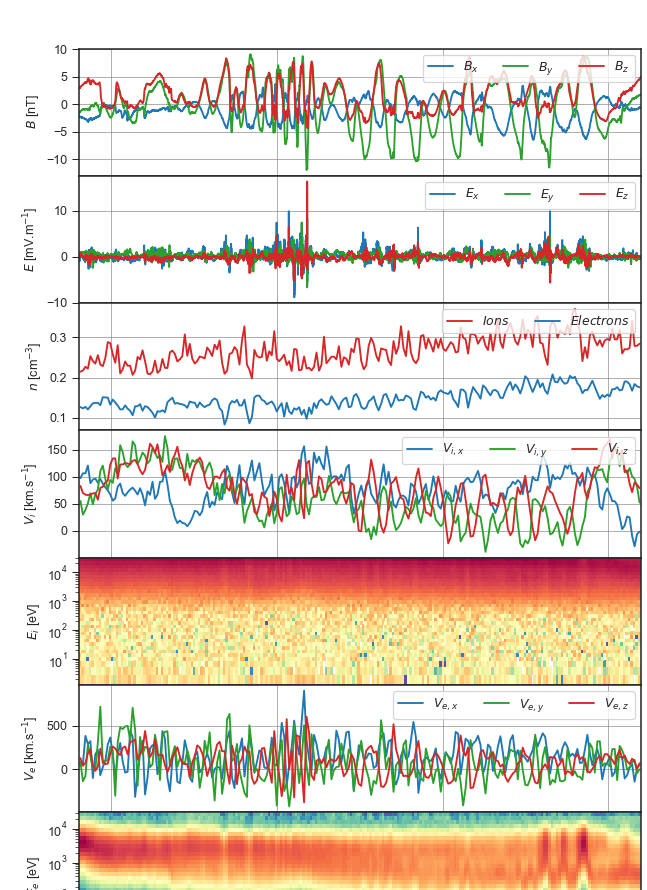

Text(0, 0.5, 'DEF\n[kev/(cm$^2$ s sr keV)]')

In [9]:
%matplotlib notebook

legend_options = dict(frameon=True, loc="upper right")

fig, axs = plt.subplots(7, sharex="all", figsize=(8, 11))
fig.subplots_adjust(bottom=.05, top=.95, left=.11, right=.89, hspace=0)

# magnetic field
plot_line(axs[0], b_xyz)
axs[0].legend(["$B_x$", "$B_y$", "$B_z$"], ncol=3, **legend_options)
axs[0].set_ylabel("$B$ [nT]")

# electric field
plot_line(axs[1], e_xyz)
axs[1].legend(["$E_x$", "$E_y$", "$E_z$"], ncol=3, **legend_options)
axs[1].set_ylabel("$E$ [mV.m$^{-1}$]")

# number density
plot_line(axs[2], n_i, color="tab:red")
plot_line(axs[2], n_e, color="tab:blue")
axs[2].legend(["$Ions$", "$Electrons$"], ncol=2, **legend_options)
axs[2].set_ylabel("$n$ [cm$^{-3}$]")

# Ion bulk velocity
plot_line(axs[3], v_xyz_i)
axs[3].legend(["$V_{i,x}$", "$V_{i,y}$", "$V_{i,z}$"], ncol=3, **legend_options)
axs[3].set_ylabel("$V_i$ [km.s$^{-1}$]")

# Ion DEF
axs[4], caxs4 = plot_spectr(axs[4], def_omni_i, yscale="log", cscale="log", cmap="Spectral_r")
axs[4].set_ylabel("$E_i$ [eV]")
caxs4.set_ylabel("DEF" + "\n" + "[kev/(cm$^2$ s sr keV)]")

# Electron bulk velocity
plot_line(axs[5], v_xyz_e)
axs[5].legend(["$V_{e,x}$", "$V_{e,y}$", "$V_{e,z}$"], ncol=3, **legend_options)
axs[5].set_ylabel("$V_e$ [km.s$^{-1}$]")

# Electron DEF
axs[6], caxs6 = plot_spectr(axs[6], def_omni_e, yscale="log", cscale="log", cmap="Spectral_r")
axs[6].set_ylabel("$E_e$ [eV]")
caxs6.set_ylabel("DEF" + "\n" + "[kev/(cm$^2$ s sr keV)]")


## Load data for all spacecraft

### Spacecaft position (MEC)

In [10]:
r_mms = [mms.get_data("r_gse_mec_srvy_l2", tint, i) for i in range(1, 5)]

09-Dec-21 10:55:54: Loading mms1_mec_r_gse...
09-Dec-21 10:55:59: Loading mms2_mec_r_gse...
09-Dec-21 10:56:04: Loading mms3_mec_r_gse...
09-Dec-21 10:56:09: Loading mms4_mec_r_gse...


### Magnetic field (FGM)

In [11]:
b_mms = [mms.get_data("b_gse_fgm_srvy_l2", tint, i) for i in range(1, 5)]

09-Dec-21 10:56:14: Loading mms1_fgm_b_gse_srvy_l2...
09-Dec-21 10:56:16: Loading mms2_fgm_b_gse_srvy_l2...
09-Dec-21 10:56:18: Loading mms3_fgm_b_gse_srvy_l2...
09-Dec-21 10:56:19: Loading mms4_fgm_b_gse_srvy_l2...


### Plot

<IPython.core.display.Javascript object>


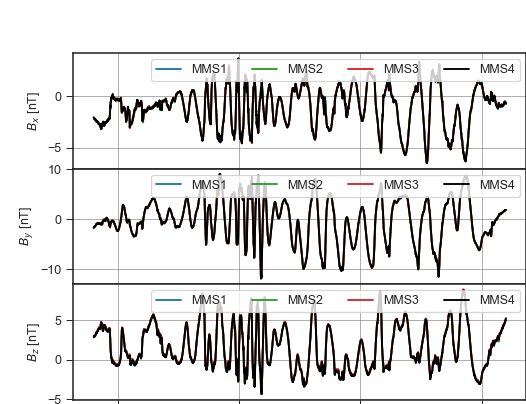

In [12]:
f, axs = plt.subplots(3, sharex="all", figsize=(6.5, 5))
f.subplots_adjust(hspace=0)

labels = ["MMS{:d}".format(i + 1) for i in range(4)]
legend_options = dict(ncol=4, frameon=True, loc="upper right")

for ax, j, c in zip(axs, [0, 1, 2], ["x", "y", "z"]):
    for i, b in enumerate(b_mms):
        plot_line(ax, b[:, j])
        
    ax.legend(labels, **legend_options)
    ax.set_ylabel("$B_{}$ [nT]".format(c))